In [55]:
#Chicago Inmate Death Data: None

In [1]:
#Chicago COVID-19 Mortality Data; 
import pandas as pd
from sodapy import Socrata

client = Socrata("data.cityofchicago.org",
                 "Y4HZT9oYB9HgwoYrJfSANZYJB",
                 username="afran190@pratt.edu",
                 password="Zeusie1219055*")

results_covid = client.get("yhhz-zm2v", limit=2000)

results_df_covid = pd.DataFrame.from_records(results_covid)

In [3]:
results_df_covid

,zip_code,week_number,week_start,week_end,cases_weekly,cases_cumulative,case_rate_weekly,case_rate_cumulative,tests_weekly,tests_cumulative,...,death_rate_weekly,death_rate_cumulative,population,row_id,zip_code_location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,60612,52,2021-12-26T00:00:00.000,2022-01-01T00:00:00.000,743,6287,2165.5,18323.6,3628,141906,...,5.8,241.9,34311,60612-2021-52,"{'type': 'Point', 'coordinates': [-87.687011, ...",28,29,21184,785,46
1,60612,1,2022-01-02T00:00:00.000,2022-01-08T00:00:00.000,603,6890,1757.5,20081,4423,146329,...,17.5,259.4,34311,60612-2022-1,"{'type': 'Point', 'coordinates': [-87.687011, ...",28,29,21184,785,46
2,60612,14,2022-04-03T00:00:00.000,2022-04-09T00:00:00.000,31,7670,90.4,22354.3,2121,181657,...,0,294.4,34311,60612-2022-14,"{'type': 'Point', 'coordinates': [-87.687011, ...",28,29,21184,785,46
3,60612,17,2022-04-24T00:00:00.000,2022-04-30T00:00:00.000,82,7852,239,22884.8,2427,187641,...,0,294.4,34311,60612-2022-17,"{'type': 'Point', 'coordinates': [-87.687011, ...",28,29,21184,785,46
4,60612,18,2022-05-01T00:00:00.000,2022-05-07T00:00:00.000,86,7938,250.6,23135.4,2426,190067,...,0,294.4,34311,60612-2022-18,"{'type': 'Point', 'coordinates': [-87.687011, ...",28,29,21184,785,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,60634,38,2023-09-17T00:00:00.000,2023-09-23T00:00:00.000,27,25974,35.5,34178.6,311,380274,...,0,338.2,75995,60634-2023-38,"{'type': 'Point', 'coordinates': [-87.797373, ...",52,17,22254,396,19
1996,60634,39,2023-09-24T00:00:00.000,2023-09-30T00:00:00.000,29,26003,38.2,34216.7,335,380609,...,0,338.2,75995,60634-2023-39,"{'type': 'Point', 'coordinates': [-87.797373, ...",52,17,22254,396,19
1997,60634,40,2023-10-01T00:00:00.000,2023-10-07T00:00:00.000,30,26033,39.5,34256.2,183,380792,...,0,338.2,75995,60634-2023-40,"{'type': 'Point', 'coordinates': [-87.797373, ...",52,17,22254,396,19
1998,60634,41,2023-10-08T00:00:00.000,2023-10-14T00:00:00.000,37,26070,48.7,34304.9,201,380993,...,0,338.2,75995,60634-2023-41,"{'type': 'Point', 'coordinates': [-87.797373, ...",52,17,22254,396,19


In [5]:
results_df_covid.to_csv('Chicago_covid_data_unclean.csv')

In [51]:
#Data Cleanup OpenRefine:
#cleaned dataset by removing all columns that did not relate to total case count and deaths 

In [9]:
df_covid = pd.read_csv('Chicago_covid_data_clean.csv')

df_covid

,zip_code,week_number,cases_cumulative,case_rate_cumulative,deaths_cumulative,death_rate_cumulative,population
0,60612,52,6287.0,18323.6,83,241.9,34311
1,60612,1,6890.0,20081.0,89,259.4,34311
2,60612,14,7670.0,22354.3,101,294.4,34311
3,60612,17,7852.0,22884.8,101,294.4,34311
4,60612,18,7938.0,23135.4,101,294.4,34311
...,...,...,...,...,...,...,...
1995,60634,38,25974.0,34178.6,257,338.2,75995
1996,60634,39,26003.0,34216.7,257,338.2,75995
1997,60634,40,26033.0,34256.2,257,338.2,75995
1998,60634,41,26070.0,34304.9,257,338.2,75995


In [19]:
#getting total sums for each zip code to make graphing + analysis more digestible

summed_totals_by_zip = df_covid.groupby('zip_code')[['cases_cumulative', 'deaths_cumulative']].sum().reset_index()

summed_totals_by_zip

,zip_code,cases_cumulative,deaths_cumulative
0,60601,46834.0,128
1,60602,32148.0,273
2,60603,2286.0,0
3,60604,2520.0,0
4,60605,40188.0,80
5,60606,6553.0,55
6,60607,48420.0,100
7,60608,108947.0,1030
8,60609,125573.0,1631
9,60610,150895.0,794


In [21]:
summed_totals_by_zip.to_csv('Chicago_covid_data_sums.csv')

In [ ]:
#Data Cleanup OpenRefine:
#transformed 'cases_cumlative' column to remove ending decimal zeros to get accurate graph

In [27]:
df_covid_totals = pd.read_csv('Chicago_covid_data_sums_clean.csv')

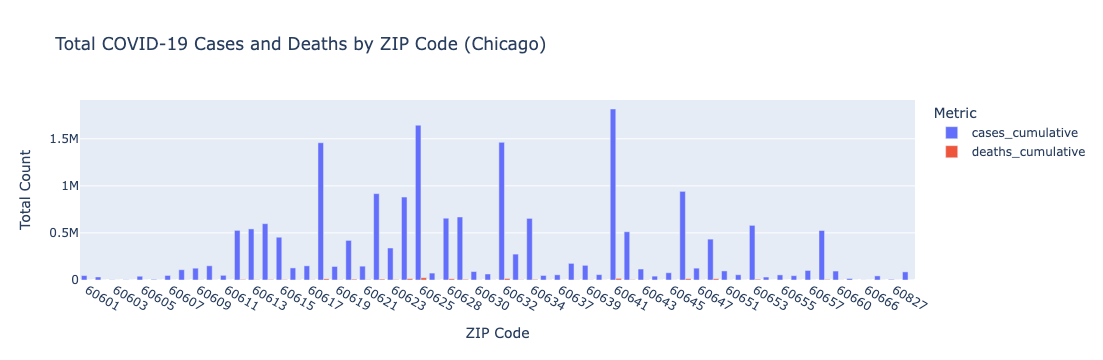

In [33]:
#still not getting accurate representation with cleaned data set

import plotly.express as px

# transform for grouped bar chart format
df_long = df_covid_totals.melt(id_vars="zip_code", value_vars=["cases_cumulative", "deaths_cumulative"],
                      var_name="Metric", value_name="Total")

# Create grouped bar chart
fig = px.bar(df_long, x="zip_code", y="Total", color="Metric", barmode="group",
             title="Total COVID-19 Cases and Deaths by ZIP Code (Chicago)",
             labels={"zip_code": "ZIP Code", "Total": "Total Count", "Metric": "Metric"})

fig.show()

In [37]:
#Chicago Drug-related Mortality Data:
import pandas as pd
from sodapy import Socrata

client = Socrata("data.cityofchicago.org",
                 "Y4HZT9oYB9HgwoYrJfSANZYJB",
                 username="afran190@pratt.edu",
                 password="Zeusie1219055*")

results_drug = client.get("j6cj-r444", limit=2000)


results_df_drug = pd.DataFrame.from_records(results_drug)

results_df_drug

,cause_of_death,community_area,community_area_name,cumulative_deaths_2004_2008,cumulative_deaths_rank,average_annual_deaths_2004_2008,average_crude_rate_2004_2008,crude_rate_lower_ci,crude_rate_upper_ci,crude_rate_rank,average_adjusted_rate_2004_2008,adjusted_rate_lower_ci,adjusted_rate_upper_ci,adjusted_rate_rank,average_annual_years_of_potential_life_lost_rate_2004_2008,ypll_rate_rank,warning
0,All Causes,1,Rogers Park,1741,22,348,614.2,585.3,643.1,51,895.2,852.2,939.3,29,7128,37,NaN
1,All Causes,2,West Ridge,2612,5,522,723.6,695.8,751.4,42,689.9,663.3,717.1,58,6123,49,NaN
2,All Causes,3,Uptown,2542,6,508,879.6,845.4,913.8,31,934,897.5,971.2,24,9147,31,NaN
3,All Causes,4,Lincoln Square,1108,40,222,547,514.8,579.2,60,698.7,657.4,741.3,53,5344,62,NaN
4,All Causes,5,North Center,690,59,138,433,400.7,465.3,68,681.2,630.1,734.3,61,4058,74,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,Suicide (intentional self-harm),74,Mount Greenwood,6,51,1,6.3,2.3,13.7,37,6.4,2.3,12.5,38,181,43,"Rate, confidence interval, and YPLL estimates ..."
1400,Suicide (intentional self-harm),75,Morgan Park,4,61,1,3.5,1,9,65,3.9,1.1,8.6,62,175,47,"Rate, confidence interval, and YPLL estimates ..."
1401,Suicide (intentional self-harm),76,O'Hare,8,40,2,12.7,5.5,25,1,13.3,5.6,24.1,2,349,7,"Rate, confidence interval, and YPLL estimates ..."
1402,Suicide (intentional self-harm),77,Edgewater,32,4,6,11.1,7.6,15.7,7,10.1,6.9,13.9,9,332,11,NaN


In [39]:
#trying to find if there is any data for drug related deaths

results_df_drug.value_counts('cause_of_death')

cause_of_death
All Causes                                                      78
All causes in females                                           78
Stroke (cerebrovascular disease)                                78
Prostate cancer in males                                        78
Lung cancer                                                     78
Liver disease and cirrhosis                                     78
Kidney disease (nephritis, nephrotic syndrome and nephrosis)    78
Injury, unintentional                                           78
Firearm-related                                                 78
Diabetes-related                                                78
Coronary heart disease                                          78
Colorectal cancer                                               78
Cancer (all sites)                                              78
Breast cancer in females                                        78
Assault (homicide)                             

In [ ]:
#no  noted drug realated deaths tracked

In [41]:
results_df_drug.to_csv('Chicago_drug_data_none.csv')